# 6.1 回归与插值

## 6.1.1 线性回归

In [1]:
import abupy
from abupy import ABuSymbolPd
import numpy as np
abupy.env.enable_example_env_ipython()
tsla_df = ABuSymbolPd.make_kl_df('usTSLA', n_folds = 2)
tsla_df.head()

enable example env will only read RomDataBu/csv


,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2014-07-23,222.49,224.75,219.43,1.33,220.01,219.58,3088731,20140723,2,0,8.9775,8.4591
2014-07-24,223.54,225.10,220.80,0.47,223.25,222.49,3248410,20140724,3,1,8.8129,8.2492
2014-07-25,223.57,226.97,221.75,0.01,222.72,223.54,3090383,20140725,4,2,8.6418,8.0328
2014-07-28,224.82,232.00,221.40,0.56,224.25,223.57,6517611,20140728,0,3,8.7351,8.2162
2014-07-29,225.01,228.30,224.86,0.08,226.61,224.82,3387187,20140729,1,4,8.5443,7.9672


In [3]:
tsla_close = tsla_df.close
x = np.arange(0, tsla_close.shape[0])
y = tsla_close.values

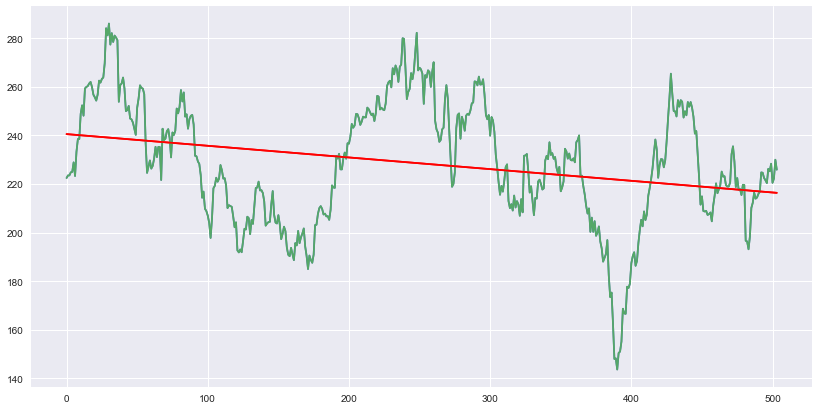

In [5]:
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt
def regress_y(y):
    y = y
    x = np.arange(0,len(y))
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    return model
model = regress_y(y)
b = model.params[0]
k = model.params[1]
y_fit = k * x + b
plt.plot(x, y)
plt.plot(x, y_fit, 'r')
model.summary()
plt.show()

In [11]:
from sklearn import metrics
import numpy as np
print('偏差绝对值之和{}'.format(metrics.mean_absolute_error(y, y_fit)))
print('偏差平方之和{}'.format(metrics.mean_squared_error(y, y_fit)))
print('偏差平方和开平方{}'.format(np.sqrt(metrics.mean_squared_error(y, y_fit))))


偏差绝对值之和19.94883736620153
偏差平方之和599.8086688451214
偏差平方和开平方24.49099158558349


## 5.1.2: 多项式回归

多项式拟合有很多的用途,不过如何使用???

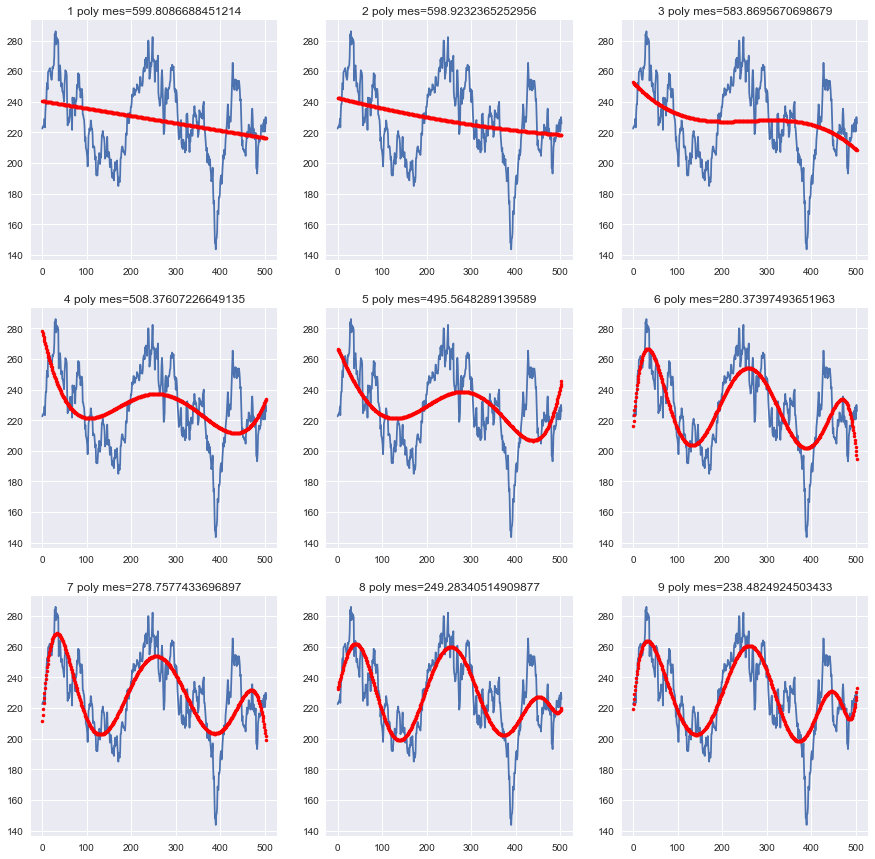

In [21]:
import itertools
# 生成9个subplots 3 * 3
_, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
# 将 3* 3 转化为一个list
axs_list = list(itertools.chain.from_iterable(axs))
# 1到9次多项式回归
poly=np.arange(1,10,1)
for p_cnt, ax in zip(poly, axs_list):
    # np.polynomial.Chebyshev.fit 进行多项式拟合     
    p = np.polynomial.Chebyshev.fit(x, y , p_cnt)
    # 使用p 直接对下序列带入即得到拟合结果序列
    y_fit = p(x)
    # 度量mse
    mse = metrics.mean_squared_error(y, y_fit)
    # 使用拟合次数和误差大小设置标题
    ax.set_title('{} poly mes={}'.format(p_cnt, mse))
    ax.plot(x,y, '', x, y_fit, 'r.')
plt.show()


## 6.1.3 插值

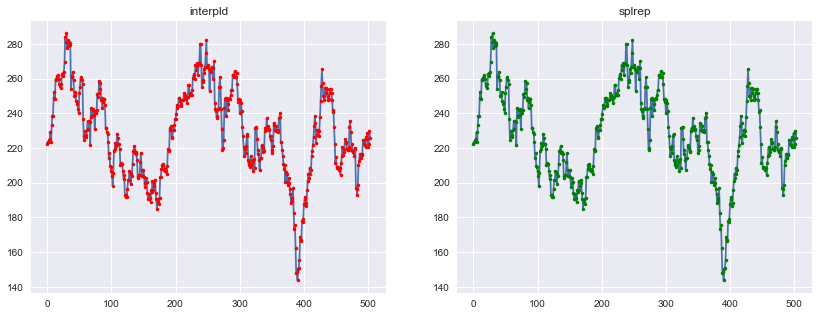

In [25]:
from scipy.interpolate import interp1d, splrep, splev
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
linear_interp = interp1d(x, y)
axs[0].set_title('interpld')
axs[0].plot(x, y , '', linear_interp(x), 'r.')
splrep_interp = splrep(x, y)
axs[1].set_title('splrep')
axs[1].plot(x, y, '', x, splev(x, splrep_interp), 'g.')
plt.show()

# 6.2 蒙特卡罗方法与凸优化

## 6.2.1 你一生的追求到底能带来多少幸福

In [44]:
from abc import ABCMeta, abstractmethod
import six
# 75 * 365 = 27375
K_INIT_LIVING_DAYS = 27375
class Person(object):
    def __init__(self):
        self.living = K_INIT_LIVING_DAYS
        self.happiness = 0
        self.wealth = 0
        self.fame = 0
        self.living_day = 0
    def live_one_day(self, seek):
        consume_living, happiness, wealth, fame = seek.do_seek_day()
        self.living -= consume_living
        self.happiness += happiness
        self.wealth += wealth
        self.fame += fame
        self.living_day += 1
        
class BaseSeekDay(six.with_metaclass(ABCMeta, object)):
    def __init__(self):
        self.living_consume = 0
        self.happiness_base = 0
        self.wealth_base = 0
        self.fame_base = 0
        
        self.living_factor=[0]
        self.happiness_factor=[0]
        self.wealth_factor=[0]
        self.fame_factor=[0]
        self.do_seek_day_cnt=0
        self._init_self()
    @abstractmethod
    def _gen_living_days(self, *args, **kwargs):
        pass
    def do_seek_day(self):
        if self.do_seek_day_cnt >=len(self.living_factor):
            consume_living = self.living_factor[-1] * self.living_consume
        else:
            consume_living = self.living_factor[self.do_seek_day_cnt] * self.living_consume
        
        if self.do_seek_day_cnt >= len(self.happiness_factor):
            happiness = self.happiness_factor[-1] * self.happiness_base
        else:
            happiness = self.happiness_factor[self.do_seek_day_cnt] * self.happiness_base
            
        if self.do_seek_day_cnt >= len(self.wealth_factor):
            wealth = self.wealth_factor[-1] * self.wealth_base
        else:
            wealth = self.wealth_factor[self.do_seek_day_cnt] * self.wealth_base
        
        if self.do_seek_day_cnt >= len(self.fame_factor):
            fame = self.fame_factor[-1] * self.fame_base
        else:
            fame = self.fame_factor[self.do_seek_day_cnt] * self.fame_base
        
        self.do_seek_day_cnt += 1
        return consume_living, happiness, wealth, fame
    
def regular_mm(group):
    return (group -group.min()) / (group.max() - group.min())
    
class HealthSeekDay(BaseSeekDay):
    def _init_self(self):
        self.living_consume = 1
        self.happiness_base = 1
        self._gen_living_days()
    
    def _gen_living_days(self):
        days = np.arange(1, 12000)
        living_day = np.sqrt(days)
        self.living_factor = regular_mm(living_day) * 2 -1
        self.happiness_factor = regular_mm(days)[::-1]
        
me = Person()
seek_health = HealthSeekDay()
while me.living > 0:
    me.live_one_day(seek_health)
print({'只追求健康长寿快乐活了{}年, 幸福指数{}, 积累财富{}, 名望权力{}'.format(
        round(me.living_day/365, 2), round(me.happiness, 2), me.wealth, me.fame)})

        

{'只追求健康长寿快乐活了97.12年, 幸福指数5999.5, 积累财富0, 名望权力0'}


In [45]:
class StockSeekDay(BaseSeekDay):
    def _init_self(self, show=False):
        self.living_consume = 2
        self.happiness_base = 0.5
        self.wealth_base = 10
        self._gen_living_days()
    def _gen_living_days(self):
        days = np.arange(1,10000)
        living_days = np.sqrt(days)
        self.living_factor = regular_mm(living_days)
        happiness_days = np.power(days, 4)
        self.happiness_factor = regular_mm(happiness_days)[::-1]
        self.wealth_factor = self.living_factor
        
me = Person()
seek_stock = StockSeekDay()
while me.living > 0:
    me.live_one_day(seek_stock)
print({'只追求健康长寿快乐活了{}年, 幸福指数{}, 积累财富{}, 名望权力{}'.format(
        round(me.living_day/365, 2), round(me.happiness, 2), round(me.wealth,2), me.fame)})

{'只追求健康长寿快乐活了46.72年, 幸福指数1000.15, 积累财富136878.35, 名望权力0'}


In [46]:
class FameSeekDay(BaseSeekDay):
    def _init_self(self, show=False):
        self.living_consume = 3
        self.happiness_base = 0.6
        self.fame_base = 10
        self._gen_living_days()
    
    def _gen_living_days(self):
        days = np.arange(1,12000)
        living_days = np.sqrt(days)  
        self.living_factor = regular_mm(living_days)
        happiness_days = np.power(days, 2)
        self.happiness_factor = regular_mm(happiness_days)[::-1]
        self.fame_factor = self.living_factor
me = Person()
seek_fame = FameSeekDay()
while me.living > 0:
    me.live_one_day(seek_fame)
print({'只追求健康长寿快乐活了{}年, 幸福指数{}, 积累财富{}, 名望权力{}'.format(
        round(me.living_day/365, 2), round(me.happiness, 2), me.wealth, round(me.fame ,2))})     

{'只追求健康长寿快乐活了36.06年, 幸福指数2400.1, 积累财富0, 名望权力91259.86'}


## 6.2.2 使用蒙特卡罗计算怎么度过一生幸福

In [47]:
def my_life(weights):
    seek_health = HealthSeekDay()
    seek_stock = StockSeekDay()
    seek_fame = FameSeekDay()
    seek_list = [seek_health, seek_stock, seek_fame]
    me = Person()
    seek_choice = np.random.choice([0,1,2], 80000, p=weights)
    while me.living > 0:
        seek_ind = seek_choice[me.living_day]
        seek = seek_list[seek_ind]
        me.live_one_day(seek)
    return round(me.living_day / 365, 2), round(me.happiness, 2), round(me.wealth, 2), round(me.fame, 2)

living_day, happiness, wealth, fame = my_life([0.4, 0.3, 0.3])
print({'只追求健康长寿快乐活了{}年, 幸福指数{}, 积累财富{}, 名望权力{}'.format(
        living_day, happiness, wealth, fame)}) 

{'只追求健康长寿快乐活了76.64年, 幸福指数9305.58, 积累财富50992.82, 名望权力46993.78'}


In [49]:
weights = np.random.random(3)
weights /= np.sum(weights)
weights

array([ 0.3645,  0.4788,  0.1567])

In [54]:
result=[]
for _ in range(2000):
    weights = np.random.random(3)
    weights /= np.sum(weights)
    result.append((weights, my_life(weights)))
    
# result 中 tuple[1] = my_life 返回的结果, my_life[1][1] = 幸福指数 , 因此 x[1][1]
sorted_scores = sorted(result, key=lambda x:x[1][2],reverse=True)
living_day, happiness, wealth, fame = my_life(sorted_scores[0][0])
print({'只追求健康长寿快乐活了{}年, 幸福指数{}, 积累财富{}, 名望权力{}'.format(
        living_day, happiness, wealth, fame)}) 
print('人生最优权重:追求健康{:.3f}, 追求财富{:.3f},追求名望{:.3f}'.format(sorted_scores[0][0][0], 
                                                               sorted_scores[0][0][1], sorted_scores[0][0][2]))

{'只追求健康长寿快乐活了56.84年, 幸福指数3747.18, 积累财富142028.35, 名望权力24.62'}
人生最优权重:追求健康0.152, 追求财富0.845,追求名望0.003


(1698.709, 4868.326]    200
(4868.326, 6410.444]    200
(6410.444, 7299.322]    200
(7299.322, 7940.15]     200
(7940.15, 8372.11]      200
(8372.11, 8686.24]      200
(8686.24, 8942.897]     200
(8942.897, 9120.208]    200
(9120.208, 9257.48]     200
(9257.48, 9371.06]      200
dtype: int64


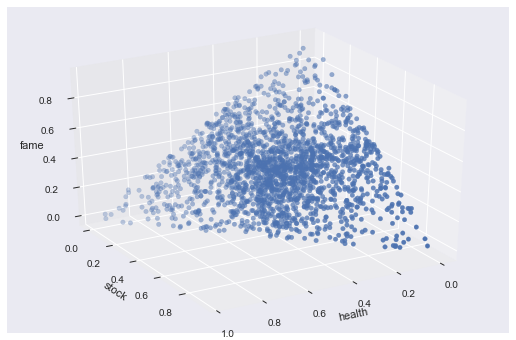

In [61]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
result_show = np.array([[r[0][0], r[0][1], r[0][2], r[1][1]] for r in result])
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
ax.view_init(30, 60)
ax.scatter3D(result_show[:, 0], result_show[:, 1], result_show[:, 2], result_show[:, 3], cmap='spring')
ax.set_xlabel('health')
ax.set_ylabel('stock')
ax.set_zlabel('fame')
happiness_result = result_show[:, 3]
print(pd.qcut(happiness_result, 10).value_counts())
plt.show()

## 6.2.3 凸优化基础概念

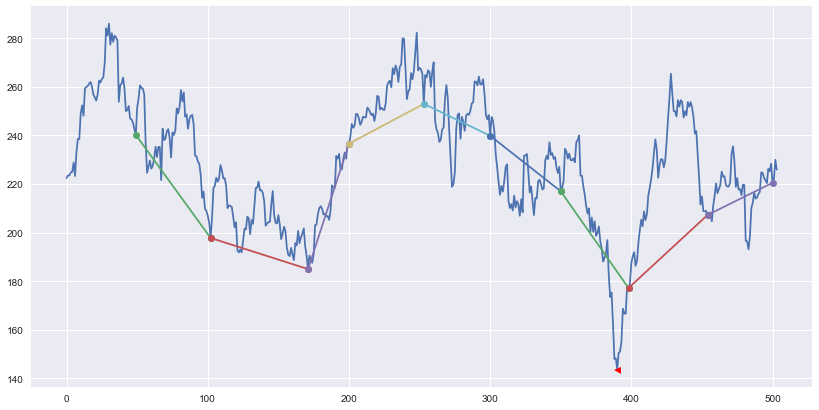

In [71]:
import scipy.optimize as sco
from scipy.interpolate import interp1d
tsla_close = ABuSymbolPd.make_kl_df('usTSLA').close
x = np.arange(0, tsla_close.shape[0])
y = tsla_close.values
linear_interp = interp1d(x, y)
plt.plot(linear_interp(x))
global_min_pos = sco.fminbound(linear_interp, 1, 504)
plt.plot(global_min_pos, linear_interp(global_min_pos), 'r<')
last_postion = None
for find_min_pos in np.arange(50, len(x), 50):
    local_min_pos = sco.fmin_bfgs(linear_interp, find_min_pos, disp=0)
    draw_postion = (local_min_pos, linear_interp(local_min_pos))
    if last_postion is not None:
        plt.plot([last_postion[0][0], draw_postion[0][0]], [last_postion[1][0], draw_postion[1][0]], 'o-')
    last_postion = draw_postion
plt.show()

## 6.2.4 全局求解怎么度过一生最幸福

In [73]:
def minimize_happiness_global(weights):
    if np.sum(weights) != 1:
        return 0
    return -my_life(weights)[1]
opt_global = sco.brute(minimize_happiness_global, ((0, 1.1, 0.1), (0,1.1,0.1), (0, 1.1, 0.1)))
opt_global

array([ 0.5,  0.2,  0.3])

In [74]:
living_day, happiness, wealth, fame = my_life(opt_global)
print('活了{}年, 幸福指数{}, 积累财富{}, 名望权力{}'.format(living_day, happiness, wealth, fame))

活了80.29年, 幸福指数9339.57, 积累财富29263.3, 名望权力49538.95


## 6.2.5 非凸函数计算怎样度过一生最幸福--跳过

## 6.2.6 标准凸函数求最优--跳过

# 6.3 线性代数

In [75]:
from abupy import ABuSymbolPd
my_stock_df = ABuSymbolPd.make_kl_df(['usBIDU', 'usGOOG', 'usFB', 'usAAPL', 'usIXIC'], n_folds=2)
my_stock_df = my_stock_df.swapaxes('items', 'minor')
my_stock_df_close = my_stock_df['close'].dropna(axis = 0)
my_stock_df_close.tail()

,usAAPL,usBIDU,usFB,usGOOG
2016-07-20,99.96,160.65,121.92,741.19
2016-07-21,99.43,161.40,120.61,738.63
2016-07-22,98.66,160.88,121.00,742.74
2016-07-25,97.34,160.25,121.63,739.77
2016-07-26,97.76,163.09,121.64,740.92


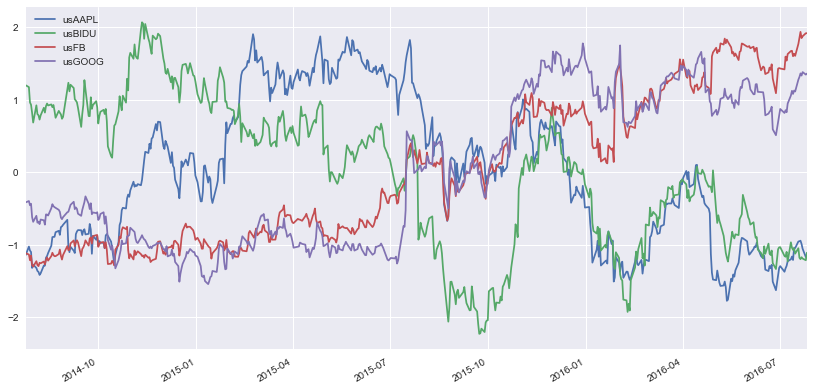

In [83]:
def regular_std(group):
    return (group - group.mean()) / group.std()
my_stock_df_close_std = regular_std(my_stock_df_close)
my_stock_df_close_std.plot()
plt.show()

## 6.3.1 矩阵基础知识

In [90]:
from scipy import mat, linalg
# dateframe 转换为 matirx
cs_matrix = my_stock_df_close.as_matrix()
cs_matrix = cs_matrix[0:4, :]
print(cs_matrix.shape)
cs_matrix

(4, 4)


array([[  97.67 ,  226.5  ,   75.19 ,  589.02 ],
       [  99.02 ,  225.8  ,   74.92 ,  590.6  ],
       [  98.38 ,  220.   ,   73.71 ,  585.61 ],
       [  98.15 ,  219.13 ,   74.677,  587.42 ]])

1、单位矩阵

In [92]:
eye4 = np.eye(4)
eye4

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

2、逆矩阵

In [91]:
cs_matrix_inv = linalg.inv(cs_matrix)
print('逆矩阵: cs_matrix_inv')
print(cs_matrix_inv)

逆矩阵: cs_matrix_inv
[[-1.1847  1.7089 -0.8717  0.3388]
 [ 0.0511  0.1206 -0.0049 -0.1676]
 [-0.7487  1.4875 -1.9971  1.2462]
 [ 0.2741 -0.5196  0.4014 -0.1508]]


In [93]:
print('相乘后的结果是单位矩阵:{}'.format(np.allclose(np.dot(cs_matrix, cs_matrix_inv), eye4)))

相乘后的结果是单位矩阵:True


## 6.3.2 特征值和特征向量

In [94]:
a= mat('[1.5 -0.5; -0.5 1.5]')
u, d = linalg.eig(a)
print('特征向量:{}'.format(u))
print('特征向量矩阵:{}'.format(d))

特征向量:[ 2.+0.j  1.+0.j]
特征向量矩阵:[[ 0.7071  0.7071]
 [-0.7071  0.7071]]


## 6.3.3 PCA 和 SVD 理论知识 -- 数学知识,不太懂

## 6.3.4 PCA 和 SVD 使用实例-- 不太懂

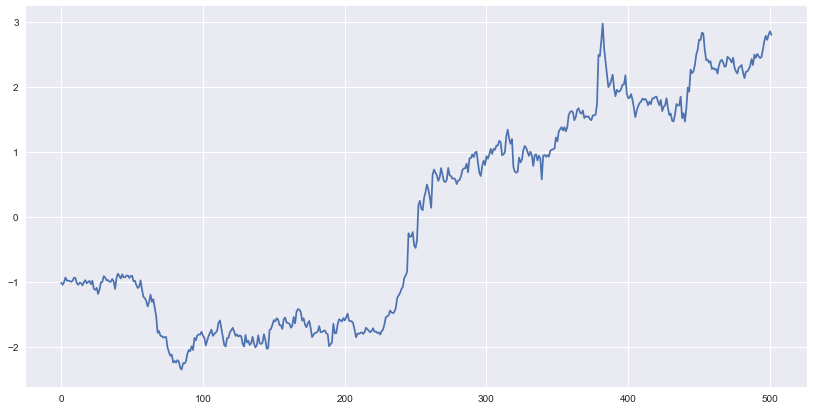

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
my_stock_df_trans_pca = pca.fit_transform(my_stock_df_close_std.as_matrix())
plt.plot(my_stock_df_trans_pca)
plt.show()

In [99]:
print(my_stock_df_close_std)
print(my_stock_df_close_std.as_matrix())

AttributeError: 'DataFrame' object has no attribute 'heas'

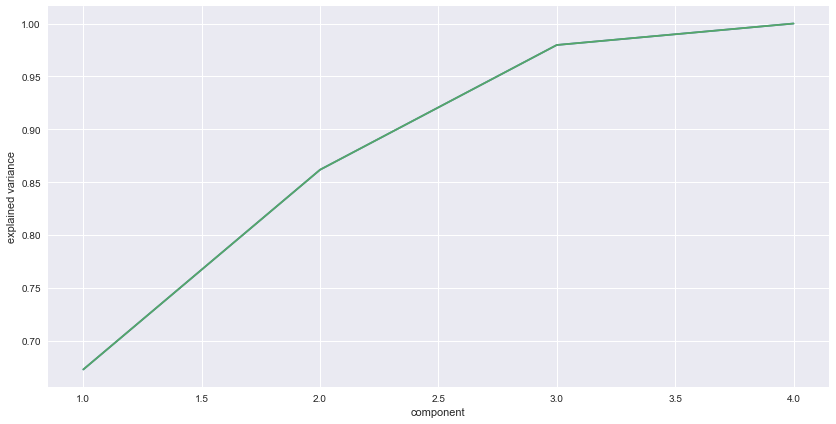

In [101]:
pca = PCA()
pca.fit(my_stock_df_close_std)
plt.plot(np.arange(1,len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('component')
plt.ylabel('explained variance')
plt.show()